# Egyptian Movies

###### Final Version

## Introduction
In this notebook, "ElCinema" dataset is analyzed and trends are visualized.   
This notebook contains:
- Data Wrangling
- Trends A: Type
- Trends B: Genre
- Trends C: Correlation between Type and Genre   

*For final conclusions about identified trends, kindly refer to the report titled "Egyptian Movies".*   


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path= os.path.join("elcinema.csv")

In [3]:
df= pd.read_csv(path)
df

,ID,YEAR,TYPE,GENRES,TITLE
0,2068747,2020,play,NaN,الأسانسير
1,2068064,2020,short,short,kabl El khamsen
2,2067919,2020,program,NaN,Thursday Night
3,2067348,2020,series,comedy,Elamara
4,2067115,2020,movie,horror,Virus
...,...,...,...,...,...
4128,2037454,2000,series,comedy,Nas min zaman fat
4129,2024781,2000,series,drama,Alssafina W Alrrbban
4130,2034034,2000,series,NaN,albahs an el saada
4131,1005775,2000,movie,drama,Wehyat Alby Wa Afraho


## Data Wrangling

#### Typing Errors:
Changing type "seriesb" to "series"

In [4]:
df["TYPE"].unique()

array(['play', 'short', 'program', 'series', 'movie', 'cartoon', 'radio',
       'mini', 'sitcom', 'documentary', 'riddles', 'seven', 'tv', 'opera',
       'seriesb'], dtype=object)

In [5]:
df.replace("seriesb", "series", inplace= True)

#### Removing repeated movies
by removing repeated IDs

In [6]:
df.drop_duplicates(subset=["ID"], inplace= True, ignore_index= True )
df.sort_values(["YEAR"], ascending= True, inplace= True)

In [7]:
#setting the ID as the index
df.set_index("ID", inplace= True)

#### Dealing with Genres (multivalued catgeorical Variable)


In [8]:
#replacing NaNs with missing to be one of the genres
df.replace(np.nan, "missing", inplace= True)

In [9]:
unique_genres  = df['GENRES'].str.get_dummies(',').astype(int)
df = pd.concat([df, unique_genres], axis=1)

In [10]:
df.rename(columns= {'YEAR':'Year', 'TYPE':'Type', 'GENRES':'GENRES', 'TITLE':'Title', 'action':'Action', 
                    'adventure':"Adventure",'animation':"Animation",'biography':"Biography",
                    'comedy':"Comedy", 'crime':"Crime", 'documentary':"Documentary", 'drama':"Drama", 'family':"Family",
                    'fantasy':"Fantasy", 'history':"History", 'horror':"Horror", 'missing':'Missing', 'musical':"Musical", 
                    'mystery':"Mystery",'religious':"Religious", 'romance':"Romance", 'science fiction':"Science Fiction",
                    'short':"Short", 'sport':"Sport", 'thriller':"Thriller",'war':"War"}, inplace= True)

In [11]:
df.drop("GENRES", inplace=True, axis=1)

In [12]:
#reorganizing the order of the columns
df= df[['Year','Type','Title','Missing','Documentary','Action','Adventure','Animation','Biography','Comedy','Crime','Drama',
        'Family','Fantasy','History','Horror','Musical','Mystery','Religious','Romance','Science Fiction','Short','Sport','Thriller','War']]

-------------------------------------------------
## Data Analysis

### A. Trends for Media Types 
#### 1.1. How many media types are represented in the dataset


In [13]:
df["Type"].value_counts()

series         1193
movie          1066
program         541
play            341
short           186
radio           178
sitcom           84
cartoon          59
tv               49
documentary      38
mini             12
riddles           7
seven             6
opera             2
Name: Type, dtype: int64

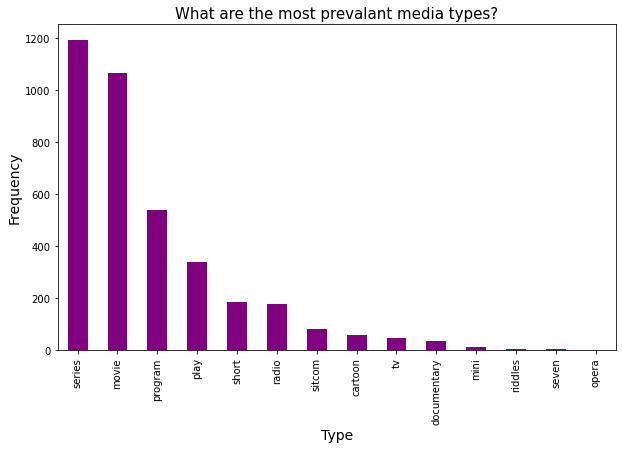

In [14]:
rcParams['figure.figsize'] = 10,6

df["Type"].value_counts().sort_values(ascending=False).plot(kind='bar',color="purple")
plt.xlabel("Type", size=14)
plt.ylabel("Frequency", size=14)
plt.title("What are the most prevalant media types?", size=15);

###### There are 14 media types represented in the dataset  
- "Short" is a media type that refers to short movies.  
- "Mini" is a media type that refers to short sitcomes.   
- "Seven" is a media type that refers to a series consisting of 7 episodes.   
The type Series followed by Movies are the common and most prevalant media categories found among the dataset.  

#### 1.2. Operas

In [16]:
df[df["Type"]== "opera"]

,Year,Type,Title,Missing,Documentary,Action,Adventure,Animation,Biography,Comedy,...,Horror,Musical,Mystery,Religious,Romance,Science Fiction,Short,Sport,Thriller,War
ID,,,,,,,,,,,,,,,,,,,,,
2033854,2000,opera,أوبريت القدس ح ترجع لنا,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967479,2010,opera,ملكة القطن والشمس,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Only 2 observations are operas and they are not very recent.
- أوبريت القدس ح ترجع لنا was in 2000 (21 years ago)
- ملكة القطن والشمس was in 2010 (11 years ago)  
This shows that operas are considered to be old and are not adopted nowadays.

#### 2. Media type and Year:  
How do media types change over the years?


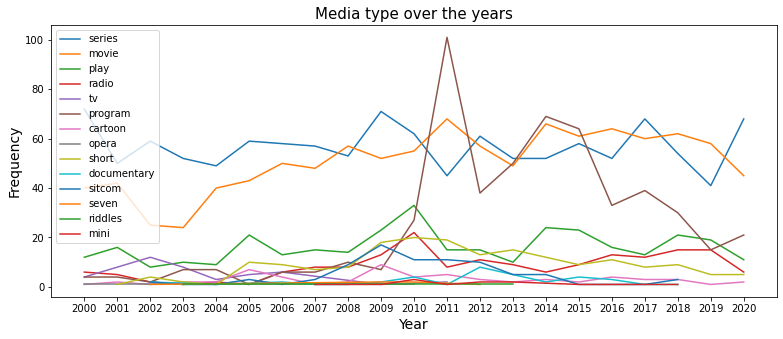

In [15]:
rcParams['figure.figsize'] = 13,5

types=df["Type"].unique()
year=df["Year"].unique()
for i in types:
    df[df["Type"]==i].groupby("Year").size().plot(kind='line',label=i)
    
plt.xticks(year)
plt.xlabel("Year", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Media type over the years", size=15)
plt.legend();

Series & Movies are produced in the greatest number over all the years. In the last year(2019-2020), movies have declined whereas series & programs have peaked in 2011 and 2014.

#### 3.1. Missing Data:  
Which types of media have more missing data? Are there any patterns?


In [17]:
missing = df.groupby("Type")["Missing"].sum()

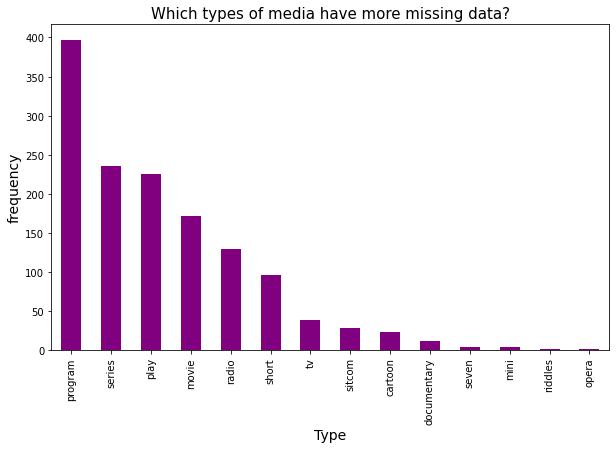

In [18]:
rcParams['figure.figsize'] = 10,6

missing.sort_values(ascending=False).plot(kind='bar',color="purple")
plt.xlabel("Type", size=14)
plt.ylabel("frequency", size= 14)
plt.title("Which types of media have more missing data?", size=15);

##### The media types with missing data in *decreasing order* are:  
- programs (over 300);  
- series and plays (over 200); 
- movies and radios (over 100).

#### 3.2. Percentage Missing Data:  
Which types of media have more missing data relatively to the count value of this media type occurring in the dataset ?

In [19]:
(missing/(df["Type"].value_counts()))*100

cartoon         40.677966
documentary     31.578947
mini            33.333333
movie           16.135084
opera          100.000000
play            66.275660
program         73.382625
radio           73.033708
riddles         28.571429
series          19.782062
seven           66.666667
short           52.150538
sitcom          34.523810
tv              79.591837
dtype: float64

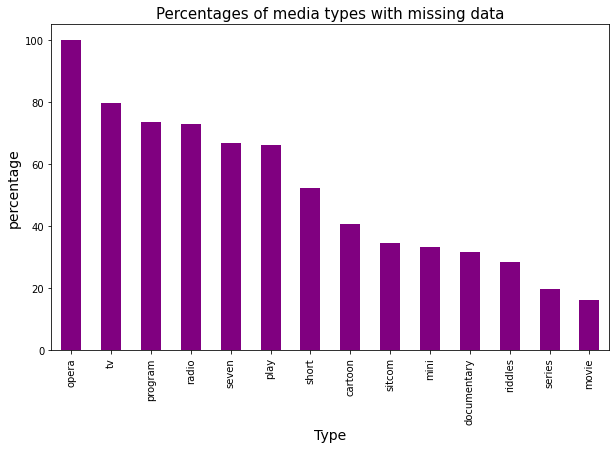

In [20]:
rcParams['figure.figsize'] = 10,6

(missing/(df["Type"].value_counts())*100).sort_values(ascending=False).plot(kind='bar',color="purple")
plt.xlabel("Type", size=14)
plt.ylabel("percentage", size= 14)
plt.title("Percentages of media types with missing data", size=15);

-------------------------------------------------------------------------
### B. Trends for Genres 

#### 1. How many genres are represented in the dataset?

In [21]:
len(df.columns[4:])

21

##### There are 21 genres represented in the dataset, which are the following:


In [22]:
genres_=df.columns[4:]
genres_

Index(['Documentary', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Musical', 'Mystery', 'Religious', 'Romance', 'Science Fiction',
       'Short', 'Sport', 'Thriller', 'War'],
      dtype='object')

#### 2. How do genres change over the years?

#### 2.1. Missing over the years

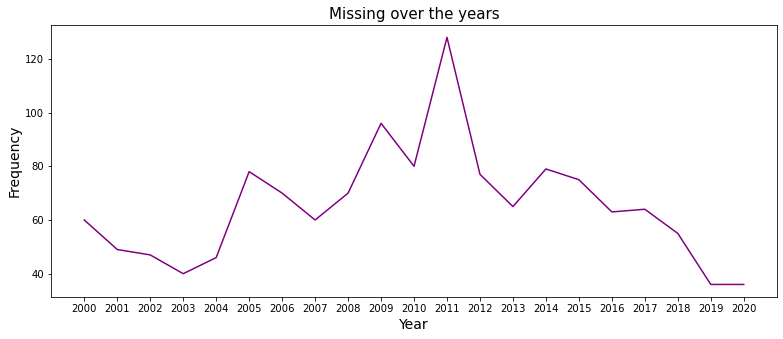

In [23]:
rcParams['figure.figsize'] = 13,5

df.groupby("Year")["Missing"].sum().plot(kind="line",color="purple")
plt.xticks(year)
plt.xlabel("Year", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Missing over the years", size=15);

##### The most missing genres were in the year 2011.

#### 2.2. The rest of the Genres over the years.

In [24]:
#summing the genres for each year
Genre_Year= df.groupby("Year")[genres_].sum()

In [25]:
#Finding the top 10 popular genres and others
genres_top= df.groupby("Year")[genres_].sum().sum(axis=0).sort_values(ascending= False)[:10]
genres_top= np.array(pd.DataFrame(genres_top).reset_index()["index"])
genres_top=np.append(genres_top,"others")

In [26]:
others= df.groupby("Year")[genres_].sum().sum(axis=0).sort_values(ascending= False)[11:]
others= np.array(pd.DataFrame(others).reset_index()["index"])
others= df.groupby("Year")[others].sum().sum(axis=1)
Genre_Year["others"]=others

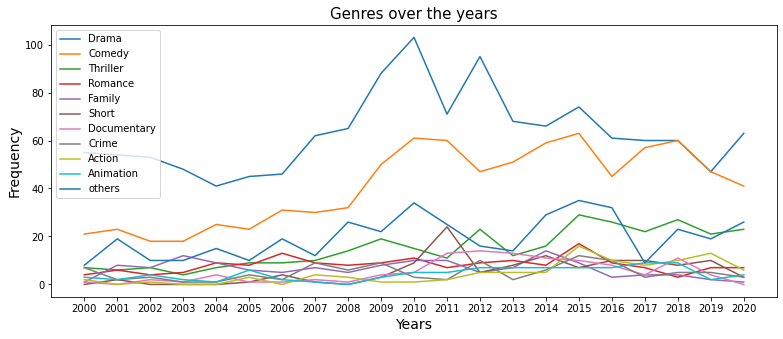

In [27]:
rcParams['figure.figsize'] = 13,5

for i in genres_top:
    P= sns.lineplot(data=Genre_Year, x= "Year", y=i, label=i)
    
P.set_xticks(year);
P.set_xlabel("Years",size=14);
P.set_ylabel("Frequency" ,size=14)
plt.title("Genres over the years", size=15);

#### The top 10 genres in Egypt that are widely adopted are the follwing:

In [28]:
print(genres_top)

['Drama' 'Comedy' 'Thriller' 'Romance' 'Family' 'Short' 'Documentary'
 'Crime' 'Action' 'Animation' 'others']


- "Drama" is the most popular genre over all the years followed by the genre "comedy".   
- Starting 2014, the genre "thriller" starting gaining popularity.   
- In 2011, the genre "short" experience  a high peak.

-------------------------------------------------------------------------
### C. The correlation between type and genre

## Heatmap

Below is a heatmap that displays the corrolation between all genres and media types, depicting the amounts of  genre for each media type 

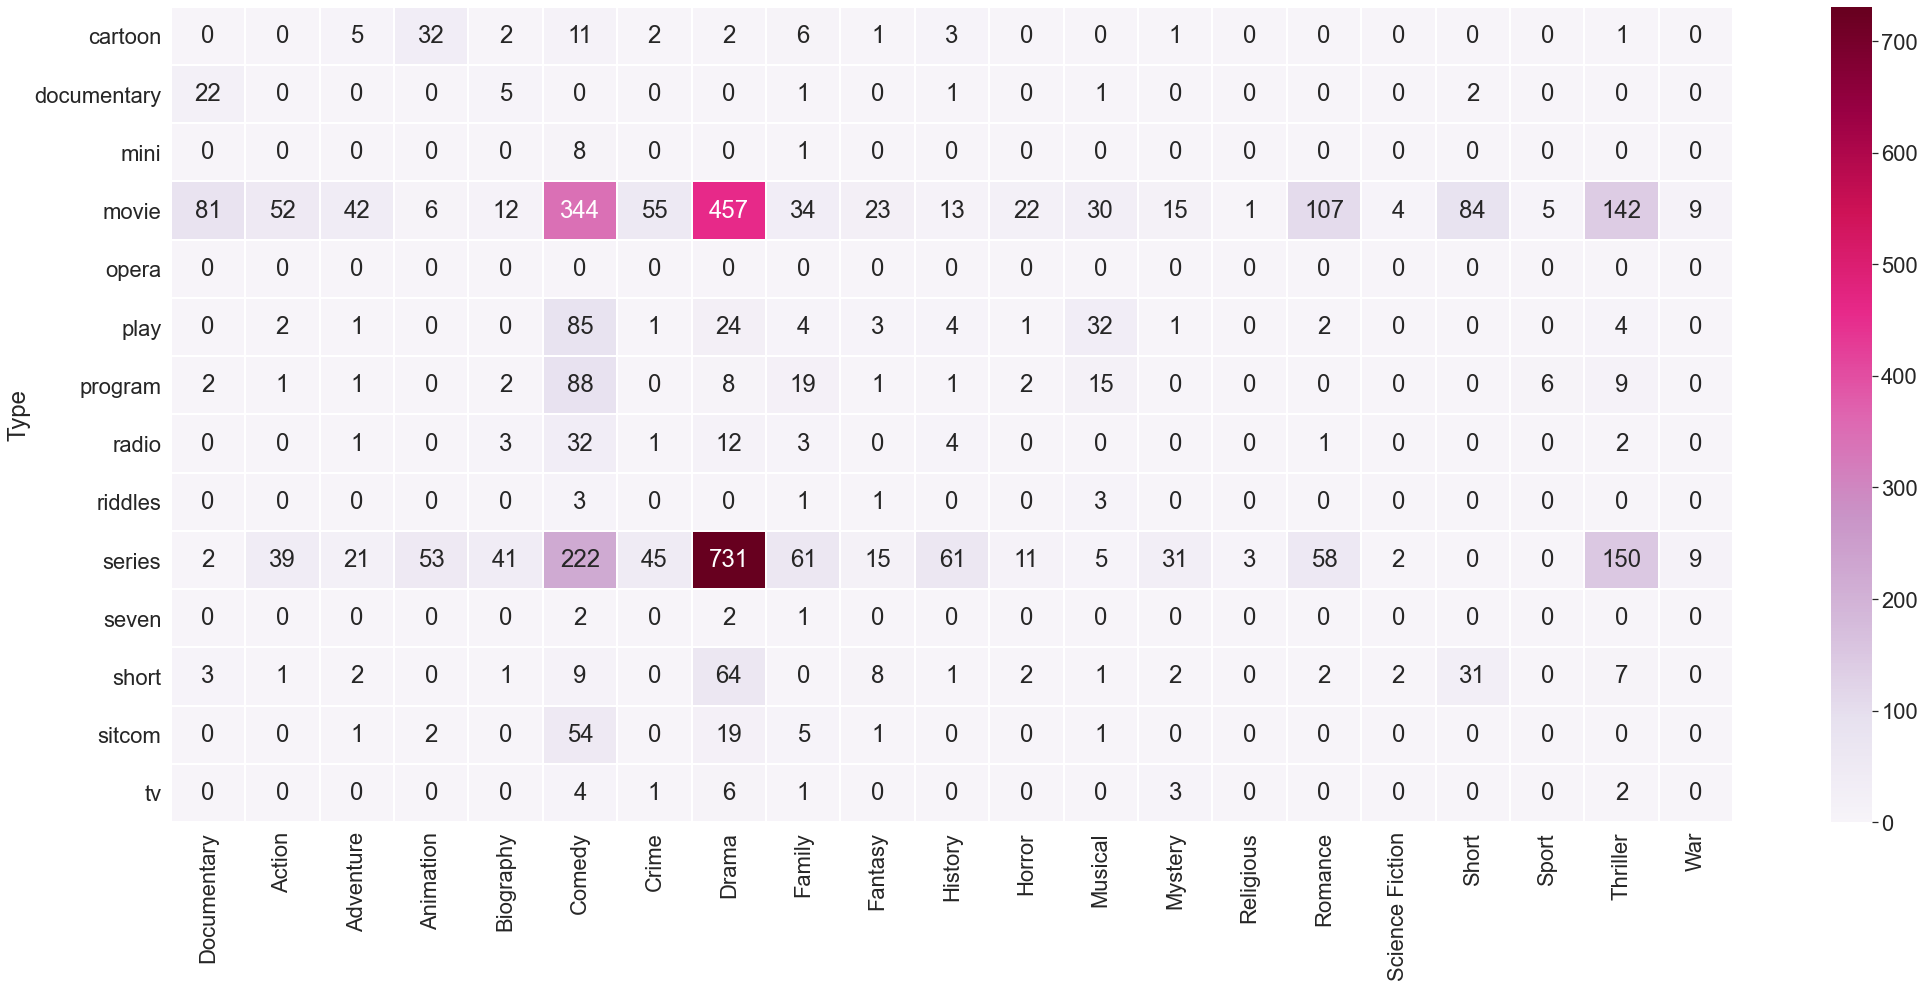

In [29]:
rcParams['figure.figsize'] = 12,4

df1=df.groupby("Type")[genres_].sum()
sns.set_theme()
sns.set(font_scale=2)
plt.figure(figsize = (35,15))
sns.heatmap(df1, annot=True, cmap= "PuRd", linewidths=-1, fmt='g');

#### 1. Genres for Movies

In [30]:
#summing the genres for each year
Genre_type= df.groupby("Type")[genres_].sum()

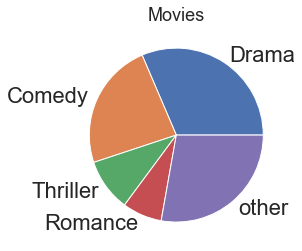

In [31]:
#Movies
m=pd.DataFrame(Genre_type.loc["movie"].sort_values(ascending= False)[:4]).reset_index()
other= Genre_type.loc["movie"].sort_values(ascending= False)[5:].sum()
m=m.append({"index":"other","movie":other}, ignore_index=True)

p= plt.pie(m["movie"], labels= np.array(m["index"]))
plt.title("Movies", size= 18);

#### 2. Genres for series

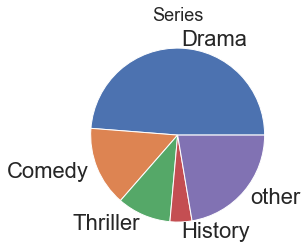

In [32]:
#Series
s=pd.DataFrame(Genre_type.loc["series"].sort_values(ascending= False)[:4]).reset_index()
other= Genre_type.loc["series"].sort_values(ascending= False)[5:].sum()
s=s.append({"index":"other","series":other}, ignore_index=True)

p= plt.pie(s["series"], labels= np.array(s["index"]))
plt.title("Series", size= 18);

#### 3. Genres for plays

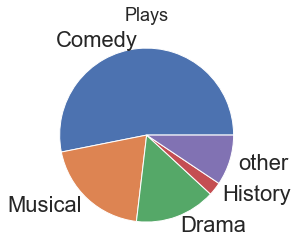

In [33]:
#Play
Play=pd.DataFrame(Genre_type.loc["play"].sort_values(ascending= False)[:4]).reset_index()
other= Genre_type.loc["play"].sort_values(ascending= False)[5:].sum()
Play=Play.append({"index":"other","play":other}, ignore_index=True)

p= plt.pie(Play["play"], labels= np.array(Play["index"]))
plt.title("Plays", size=18);

#### 4. Genres for programs

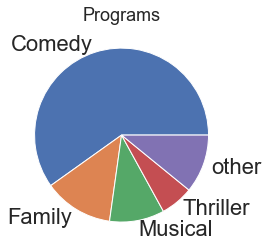

In [34]:
#Program
Prog=pd.DataFrame(Genre_type.loc["program"].sort_values(ascending= False)[:4]).reset_index()
other= Genre_type.loc["program"].sort_values(ascending= False)[5:].sum()
Prog=Prog.append({"index":"other","program":other}, ignore_index=True)
p= plt.pie(Prog["program"], labels= np.array(Prog["index"]))
plt.title("Programs", size= 18);

## Conclusion:
1. Series: 
  - The most common genre among series is drama that is followed by comedy. 
  - This media type is one of the highest in adopting the genre "drama" compared to other media types
2. Movies:
  - The most common genre among movies is drama that is followed by comedy.
  - This media type is one of the highest in adopting the genre "comedy" compared to other media types
3. Plays:
  - The most common genre among plays is comedy that is follwed by musicals
4. Program:
  - The most common gerne among programs is comedy that is followed by family
5. Missing Values:
  - Most missing values were in 2011, which happens to be the year of the Egyptian Revolution

## References:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html   
https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot   